# Vector Operations: Scalar Multiplication, Sum and Dot Product of Vectors

In this lab you will use Python and `NumPy` functions to perform main vector operations: scalar multiplication, sum of vectors and their dot product. You will also investigate the speed of calculations using loop and vectorized forms of these main linear algebra operations

# Table of Contents
- [ 1 - Scalar Multiplication and Sum of Vectors](#1)
  - [ 1.1 - Visualization of a Vector $v\in\mathbb{R}^2$](#1.1)
  - [ 1.2 - Scalar Multiplication](#1.2)
  - [ 1.3 - Sum of Vectors](#1.3)
  - [ 1.4 - Norm of a Vector](#1.4)
- [ 2 - Dot Product](#2)
  - [ 2.1 - Algebraic Definition of the Dot Product](#2.1)
  - [ 2.2 - Dot Product using Python](#2.2)
  - [ 2.3 - Speed of Calculations in Vectorized Form](#2.3)
  - [ 2.4 - Geometric Definition of the Dot Product](#2.4)
  - [ 2.5 - Application of the Dot Product: Vector Similarity](#2.5)

## Packages

Load the `NumPy` package to access its functions.

In [1]:
import numpy as np

<a name='1'></a>
## 1 - Scalar Multiplication and Sum of Vectors

<a name='1.1'></a>
### 1.1 - Visualization of a Vector $v\in\mathbb{R}^2$

You already have seen in the videos and labs, that vectors can be visualized as arrows, and it is easy to do it for a $v\in\mathbb{R}^2$, e.g.
$v=\begin{bmatrix}
          1 & 3
\end{bmatrix}^T$

The following code will show the visualization.

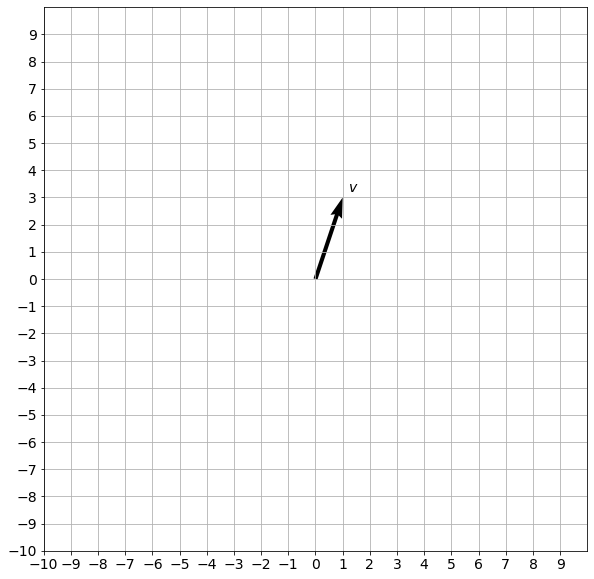

In [2]:
import matplotlib.pyplot as plt

def plot_vectors(list_v, list_label, list_color):
    _, ax = plt.subplots(figsize=(10, 10))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))
    
    
    plt.axis([-10, 10, -10, 10])
    for i, v in enumerate(list_v):
        sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v)])
        plt.quiver(v[0], v[1], color=list_color[i], angles='xy', scale_units='xy', scale=1)
        ax.text(v[0]-0.2+sgn[0], v[1]-0.2+sgn[1], list_label[i], fontsize=14, color=list_color[i])

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

v = np.array([[1],[3]])
# Arguments: list of vectors as NumPy arrays, labels, colors.
plot_vectors([v], [f"$v$"], ["black"])

The vector is defined by its **norm (length, magnitude)** and **direction**, not its actual position. But for clarity and convenience vectors are often plotted starting in the origin (in $\mathbb{R}^2$ it is a point $(0,0)$) .

<a name='1.2'></a>
### 1.2 - Scalar Multiplication

**Scalar multiplication** of a vector $v=\begin{bmatrix}
          v_1 & v_2 & \ldots & v_n 
\end{bmatrix}^T\in\mathbb{R}^n$ by a scalar $k$ is a vector $kv=\begin{bmatrix}
          kv_1 & kv_2 & \ldots & kv_n 
\end{bmatrix}^T$ (element by element multiplication). If $k>0$, then $kv$ is a vector pointing in the same direction as $v$ and it is $k$ times as long as $v$. If $k=0$, then $kv$ is a zero vector. If $k<0$, vector $kv$ will be pointing in the opposite direction. In Python you can perform this operation with a `*` operator. Check out the example below:

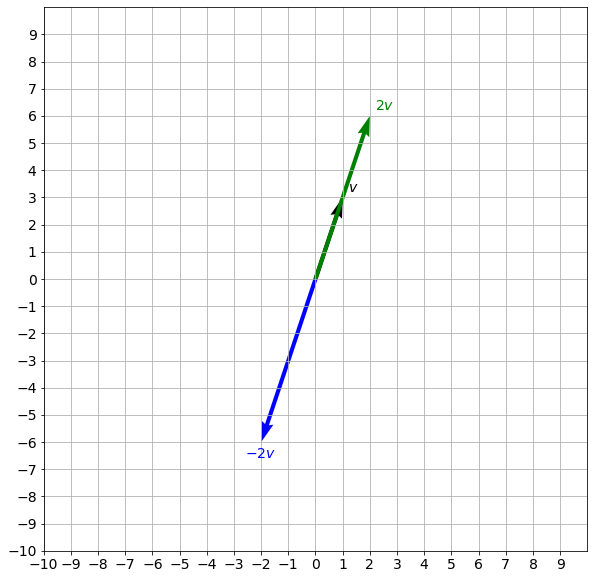

In [3]:
plot_vectors([v, 2*v, -2*v], [f"$v$", f"$2v$", f"$-2v$"], ["black", "green", "blue"])

<a name='1.3'></a>
### 1.3 - Sum of Vectors

**Sum of vectors (vector addition)** can be performed by adding the corresponding components of the vectors: if $v=\begin{bmatrix}
          v_1 & v_2 & \ldots & v_n 
\end{bmatrix}^T\in\mathbb{R}^n$ and  
$w=\begin{bmatrix}
          w_1 & w_2 & \ldots & w_n 
\end{bmatrix}^T\in\mathbb{R}^n$, then $v + w=\begin{bmatrix}
          v_1 + w_1 & v_2 + w_2 & \ldots & v_n + w_n 
\end{bmatrix}^T\in\mathbb{R}^n$. The so-called **parallelogram law** gives the rule for vector addition. For two vectors $u$ and $v$ represented by the adjacent sides (both in magnitude and direction) of a parallelogram drawn from a point, the vector sum $u+v$ is is represented by the diagonal of the parallelogram drawn from the same point:

<img src = "images/sum_of_vectors.png" width="230" align="middle"/>

In Python you can either use `+` operator or `NumPy` function `np.add()`. In the following code you can uncomment the line to check that the result will be the same:

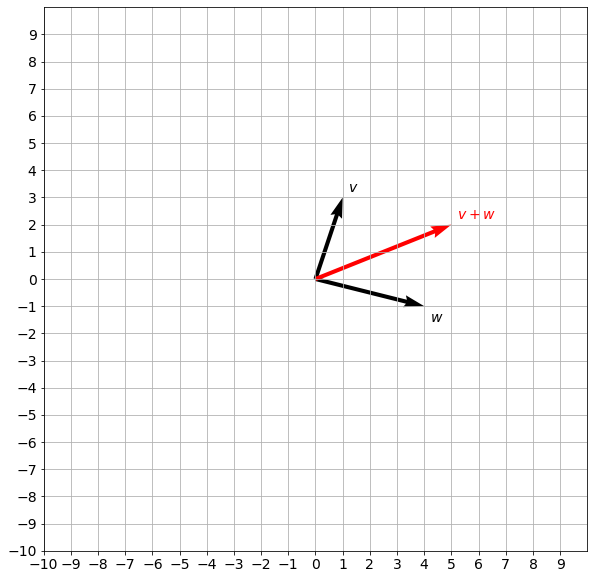

In [4]:
v = np.array([[1],[3]])
w = np.array([[4],[-1]])

plot_vectors([v, w, v + w], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])
# plot_vectors([v, w, np.add(v, w)], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])

<a name='1.4'></a>
### 1.4 - Norm of a Vector

The norm of a vector $v$ is denoted as $\lvert v\rvert$. It is a nonnegative number that describes the extent of the vector in space (its length). The norm of a vector can be found using `NumPy` function `np.linalg.norm()`:

In [5]:
print("Norm of a vector v is", np.linalg.norm(v))

Norm of a vector v is 3.1622776601683795


<a name='2'></a>
## 2 - Dot Product

<a name='2.1'></a>
### 2.1 - Algebraic Definition of the Dot Product

The **dot product** (or **scalar product**) is an algebraic operation that takes two vectors $x=\begin{bmatrix}
          x_1 & x_2 & \ldots & x_n 
\end{bmatrix}^T\in\mathbb{R}^n$ and  
$y=\begin{bmatrix}
          y_1 & y_2 & \ldots & y_n 
\end{bmatrix}^T\in\mathbb{R}^n$ and returns a single scalar. The dot product can be represented with a dot operator $x\cdot y$ and defined as:

$$x\cdot y = \sum_{i=1}^{n} x_iy_i = x_1y_1+x_2y_2+\ldots+x_ny_n \tag{1}$$

<a name='2.2'></a>
### 2.2 - Dot Product using Python

The simplest way to calculate dot product in Python is to take the sum of element by element multiplications. You can define the vectors $x$ and $y$ by listing their coordinates:

In [6]:
x = [1, -2, -5]
y = [4, 3, -1]

Next, let’s define a function `dot(x,y)` for the dot product calculation:

In [7]:
def dot(x, y):
    s=0
    for xi, yi in zip(x, y):
        s += xi * yi
    return s

For the sake of simplicity, let’s assume that the vectors passed to the above function are always of the same size, so that you don’t need to perform additional checks.

Now everything is ready to perform the dot product calculation calling the function `dot(x,y)`:

In [8]:
print("The dot product of x and y is", dot(x, y))

The dot product of x and y is 3


Dot product is very a commonly used operator, so `NumPy` linear algebra package provides quick way to calculate it using function `np.dot()`:

In [9]:
print("np.dot(x,y) function returns dot product of x and y:", np.dot(x, y)) 

np.dot(x,y) function returns dot product of x and y: 3


Note that you did not have to define vectors $x$ and $y$ as `NumPy` arrays, the function worked even with the lists. But there are alternative functions in Python, such as explicit operator `@` for the dot product, which can be applied only to the `NumPy` arrays. You can run the following cell to check that.

In [10]:
print("This line output is a dot product of x and y: ", np.array(x) @ np.array(y))

print("\nThis line output is an error:")
try:
    print(x @ y)
except TypeError as err:
    print(err)

This line output is a dot product of x and y:  3

This line output is an error:
unsupported operand type(s) for @: 'list' and 'list'


As both `np.dot()` and `@` operators are commonly used, it is recommended to define vectors as `NumPy` arrays to avoid errors. Let's redefine vectors $x$ and $y$ as `NumPy` arrays to be safe:

In [11]:
x = np.array(x)
y = np.array(y)

<a name='2.3'></a>
### 2.3 - Speed of Calculations in Vectorized Form

Dot product operations in Machine Learning applications are applied to the large vectors with hundreds or thousands of coordinates (called **high dimensional vectors**). Training models based on large datasets often takes hours and days even on powerful machines. Speed of calculations is crucial for the training and deployment of your models. 

It is important to understand the difference in the speed of calculations using vectorized and the loop forms of the vectors and functions. In the loop form operations are performed one by one, while in the vectorized form they can be performed in parallel. In the section above you defined loop version of the dot product calculation (function `dot()`), while `np.dot()` and `@` are the functions representing vectorized form.

Let's perform a simple experiment to compare their speed. Define new vectors $a$ and $b$ of the same size $1,000,000$:

In [12]:
a = np.random.rand(1000000)
b = np.random.rand(1000000)

Use `time.time()` function to evaluate amount of time (in seconds) required to calculate dot product using the function `dot(x,y)` which you defined above: 

In [13]:
import time

tic = time.time()
c = dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the loop version:" + str(1000*(toc-tic)) + " ms")

Dot product:  249807.52357347292
Time for the loop version:593.7082767486572 ms


Now compare it with the speed of the vectorized versions:

In [14]:
tic = time.time()
c = np.dot(a,b)
toc = time.time()
print("Dot product: ", c)
print ("Time for the vectorized version, np.dot() function: " + str(1000*(toc-tic)) + " ms")

Dot product:  249807.52357347292
Time for the vectorized version, np.dot() function: 2.61688232421875 ms


In [15]:
tic = time.time()
c = a @ b
toc = time.time()
print("Dot product: ", c)
print ("Time for the vectorized version, @ function: " + str(1000*(toc-tic)) + " ms")

Dot product:  249807.52357347292
Time for the vectorized version, @ function: 1.676321029663086 ms


You can see that vectorization is extremely beneficial in terms of the speed of calculations!

<a name='2.4'></a>
### 2.4 - Geometric Definition of the Dot Product

In [Euclidean space](https://en.wikipedia.org/wiki/Euclidean_space), a Euclidean vector has both magnitude and direction. The dot product of two vectors $x$ and $y$ is defined by:

$$x\cdot y = \lvert x\rvert \lvert y\rvert \cos(\theta),\tag{2}$$

where $\theta$ is the angle between the two vectors:

<img src = "images/dot_product_geometric.png" width="230" align="middle"/>

This provides an easy way to test the orthogonality between vectors. If $x$ and $y$ are orthogonal (the angle between vectors is $90^{\circ}$), then since $\cos(90^{\circ})=0$, it implies that **the dot product of any two orthogonal vectors must be $0$**. Let's test it, taking two vectors $i$ and $j$ we know are orthogonal:

In [16]:
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
print("The dot product of i and j is", dot(i, j))

The dot product of i and j is 0


<a name='2.5'></a>
### 2.5 - Application of the Dot Product: Vector Similarity

Geometric definition of a dot product is used in one of the applications - to evaluate **vector similarity**. In Natural Language Processing (NLP) words or phrases from vocabulary are mapped to a corresponding vector of real numbers. Similarity between two vectors can be defined as a cosine of the angle between them. When they point in the same direction, their similarity is 1 and it decreases with the increase of the angle. 

Then equation $(2)$ can be rearranged to evaluate cosine of the angle between vectors:

$\cos(\theta)=\frac{x \cdot y}{\lvert x\rvert \lvert y\rvert}.\tag{3}$

Zero value corresponds to the zero similarity between vectors (and words corresponding to those vectors). Largest value is when vectors point in the same direction, lowest value is when vectors point in the opposite directions.

This example of vector similarity is given to link the material with the Machine Learning applications. There will be no actual implementation of it in this Course. Some examples of implementation can be found in the Natual Language Processing Specialization.

Well done, you have finished this lab!